# Pandas 1 Exercise

### Suleyman Gozen
 
 I thank Yung-Hsu Tsui for his valuable comments.

In [7]:
""" Problem 1 """

import pandas as pd
A = np.linspace(0,50,26)
B = A*A-1
for i in range(len(B)):
    i +=1
    if np.remainder(A[i-1],3) == 0:
        B[i-1]= 0
    else:
        B       
s = pd.Series(B, index=A)
s

0.0        0.0
2.0        3.0
4.0       15.0
6.0        0.0
8.0       63.0
10.0      99.0
12.0       0.0
14.0     195.0
16.0     255.0
18.0       0.0
20.0     399.0
22.0     483.0
24.0       0.0
26.0     675.0
28.0     783.0
30.0       0.0
32.0    1023.0
34.0    1155.0
36.0       0.0
38.0    1443.0
40.0    1599.0
42.0       0.0
44.0    1935.0
46.0    2115.0
48.0       0.0
50.0    2499.0
dtype: float64

In [10]:
""" Problem 2 """

import pandas as pd
from numpy import random


def func(d, p, I):
    B = np.linspace(0, len(I)-1, len(I))
    B[0] = d
    for i in range(1, len(I)):
        if B[i-1] < 0:
            B[i] = 0
        else:
            b = np.random.binomial(1, p, 1)
            if b == 1:
                B[i] = B[i-1] + 1
            else: 
                B[i] = B[i-1] - 1
        i += 1
    return B
I = pd.date_range("1/1/2000", "12/31/2000", freq='D')
C = pd.Series(func(100,0.5, I ), index= I)
plt.plot(C)

In [5]:
""" Problem 3 """
name = ['Mylan', 'Regan', 'Justin', 'Jess', 'Jason', 'Remi', 'Matt', 'Alexander', 'JeanMarie']
sex = ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'M', 'F']
age = [20, 21, 18, 22, 19, 20, 20, 19, 20]
rank = ['Sp', 'Se', 'Fr', 'Se', 'Sp', 'J', 'J', 'J', 'Se']
ID = range(9)
aid = ['y', 'n', 'n', 'y', 'n', 'n', 'n', 'y', 'n']
GPA = [3.8, 3.5, 3.0, 3.9, 2.8, 2.9, 3.8, 3.4, 3.7]
mathID = [0, 1, 5, 6, 3]
mathGd = [4.0, 3.0, 3.5, 3.0, 4.0]
major = ['y', 'n', 'y', 'n', 'n']
studentInfo = pd.DataFrame({'ID': ID, 'Name': name, 'Sex': sex, 'Age': age, 'Class': rank})
otherInfo = pd.DataFrame({'ID': ID, 'GPA': GPA, 'Financial_Aid': aid})
mathInfo = pd.DataFrame({'ID': mathID, 'Grade': mathGd, 'Math_Major': major})

male19 = studentInfo[(studentInfo['Age'] > 19)&(studentInfo['Sex'] == 'M')].loc[:,['ID', 'Name']]
male19.head()

,ID,Name
0,0,Mylan
6,6,Matt


In [6]:
""" Problem 4 """
male = pd.merge(studentInfo, otherInfo, on='ID')[studentInfo['Sex'] == 'M'].loc[:,['ID', 'Age', 'GPA']]
male.head()

,ID,Age,GPA
0,0,20,3.8
2,2,18,3.0
4,4,19,2.8
6,6,20,3.8
7,7,19,3.4


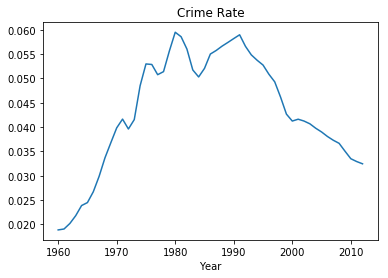

    Year      Rate
20  1980  0.059500
31  1991  0.058978
21  1981  0.058582
30  1990  0.058203
29  1989  0.057410
Total       1.063807e+07
Burglary    2.446286e+06
dtype: float64
    Year     Total  Burglary
13  1973   8718100   2565500
14  1974  10253400   3039200


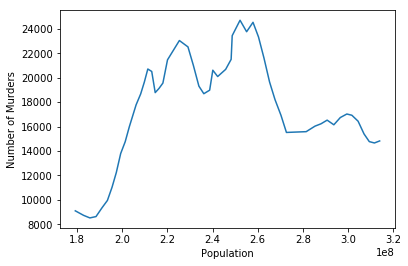

In [5]:
""" Problem 5 """
crime = pd.read_csv('crime_data.txt', skiprows=1)
crime["Rate"] = crime["Total"] / crime["Population"]

#Plot Crime Rate
plt.plot(crime["Year"],crime["Rate"])
plt.title("Crime Rate")
plt.xlabel("Year")
plt.show()

#Top 5 years with highest crime
print(crime.nlargest(5,'Rate')[['Year','Rate']])

#Average Total Crimes
print(crime[['Total', 'Burglary']].mean(axis=0))

#Total Crimes below, Burgaliers above 
print(crime[(crime["Total"] < crime["Total"].mean()) & (crime["Burglary"] > crime["Burglary"].mean())].loc[:,["Year","Total","Burglary"]])

#Plot murder as function of population
plt.plot(crime["Population"],crime["Murder"])
plt.xlabel("Population")
plt.ylabel("Number of Murders")
plt.show()

#Save to CSV
crime[(crime['Year'] > 1979) & (crime['Year'] < 1990)].loc[:,["Population","Violent","Robbery"]].to_csv("crime_subset.txt")

In [ ]:
""" Problem 6 """

titanic_data = pd.read_csv('titanic.csv')
titanic_data = titanic_data.drop(["Sibsp", "Parch", "Cabin", "Boat", "Body", "home.dest"], axis=1)
titanic_data.dropna(subset=['Survived']) # Drop the observations that has NA value in 'Survived' 
titanic_data.Survived.replace({1: True, 0: False}) # Drop any entries without data in the "Survived" column, then change the remaining entries to True or False (they start as 1 or 0).
titanic_data.Age.fillna(titanic_data.Age.mean())
titanic_data.to_csv('titanic_clean.csv')
titanic_clean_data = pd.read_csv('titanic_clean.csv')

In [ ]:
# How many peopled survived? What percentage of passengers survived?
print('How many survived? : ',titanic_clean_data['Survived'].sum())
print('What percentage survived? : ', 100*titanic_clean_data['Survived'].sum()/len(titanic_clean_data['Survived']))

#What was the average price of a ticket? 
#How much did the most expensive ticket cost?
print('Average price of a ticket? : ',titanic_clean_data['Fare'].mean())
print('Max price of a ticket? : ',titanic_clean_data['Fare'].max())

print('Oldest survivor : ',titanic_clean_data[(titanic_clean_data['Survived'] ==1.0)][['Age']].max())

print('Youngest survivor : ',titanic_clean_data[(titanic_clean_data['Survived'] ==1.0)][['Age']].min())

print('Oldest non-survivor : ',titanic_clean_data[(titanic_clean_data['Survived'] ==0.0)][['Age']].max())

print('Yougest non-survivor : ',titanic_clean_data[(titanic_clean_data['Survived'] ==0.0)][['Age']].min())